In [15]:
import os
import re
from functools import reduce
from typing import Any

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties, findfont

from sentence_topology.classification.analysis import ClassifierAnalysisResults

pd.set_option("display.max_colwidth", 100)

In [16]:
sns.set_theme(context="paper", style="whitegrid", palette="muted")
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.bbox"] = "tight"

#### Default font

In [17]:
font = findfont(FontProperties(family=["sans-serif"]))
print(font)

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


In [18]:
RESULTS_DIR = "../results/cls_gs/"
CONTEXT = "diff"
CM = 1 / 2.54

SBERT_NAME = "paraphrase-multilingual-MiniLM-L12-v2"
DOC2VEC_NAME = "doc2vec-cs-vecsize-512-train-1M-sents"

SBERT_SUPERVISED_SPLITS = 5

EMBEDDINGS = [
    f"{DOC2VEC_NAME}.tsv",
    f"{SBERT_NAME}.tsv",
    "tfidf_all.tsv",
    "bow_all.tsv",
]
EMBEDDINGS += ["mixup_by_seed_" + name for name in EMBEDDINGS]
EMBEDDINGS += [
    f"{SBERT_NAME}_supervised_{i}.tsv" for i in range(SBERT_SUPERVISED_SPLITS)
]

CLASSIFIERS = ["RandomForestClassifier", "SVC", "KNeighborsClassifier"]

#### Limiting the embeddings and classifiers considered

In [19]:
EXPERIMENT_ROOT = os.path.join(RESULTS_DIR, CONTEXT)

scores = pd.read_pickle(os.path.join(EXPERIMENT_ROOT, "scores.pkl"))
params = pd.read_pickle(os.path.join(EXPERIMENT_ROOT, "params.pkl"))

In [20]:
def embed_rename(old_name: str) -> str:
    new_name = old_name
    if SBERT_NAME in new_name:
        new_name = re.sub(SBERT_NAME, "sbert", new_name)
    if new_name.endswith("_all.tsv"):
        new_name = re.sub("_all", "", new_name)
    if DOC2VEC_NAME in new_name:
        new_name = re.sub(DOC2VEC_NAME, "doc2vec", new_name)
    if new_name.endswith(".tsv"):
        new_name = re.sub(".tsv", "", new_name)

    return new_name

In [21]:
def process_params_or_scores(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop([name for name in df.index if name not in EMBEDDINGS], axis=0)
    df = df.drop([cls for cls in df.columns if cls not in CLASSIFIERS], axis=1)
    df = df.rename(embed_rename)
    return df

In [22]:
params = process_params_or_scores(params)
scores = process_params_or_scores(scores)

In [23]:
scores

,RandomForestClassifier,SVC,KNeighborsClassifier
sbert,0.400685,0.424614,0.281015
sbert_supervised_4,0.420622,0.409587,0.365371
sbert_supervised_1,0.410439,0.384084,0.359910
sbert_supervised_3,0.415015,0.379831,0.352237
doc2vec,0.208610,0.221112,0.151276
sbert_supervised_2,0.437889,0.414458,0.379228
tfidf,0.351839,0.260992,0.183049
sbert_supervised_0,0.437000,0.396428,0.390256
mixup_by_seed_doc2vec,0.082172,0.071041,0.079116
mixup_by_seed_sbert,0.084279,0.078651,0.077795


In [24]:
params

,RandomForestClassifier,SVC,KNeighborsClassifier
sbert,"{'max_depth': 25, 'min_samples_split': 20, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 3, 'knn__weights': 'distance'}"
sbert_supervised_4,"{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 3, 'knn__weights': 'distance'}"
sbert_supervised_1,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 5, 'knn__weights': 'distance'}"
sbert_supervised_3,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 5, 'knn__weights': 'distance'}"
doc2vec,"{'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 3, 'knn__weights': 'distance'}"
sbert_supervised_2,"{'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 10, 'knn__weights': 'distance'}"
tfidf,"{'max_depth': None, 'min_samples_split': 20, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'linear'}","{'knn__n_neighbors': 3, 'knn__weights': 'distance'}"
sbert_supervised_0,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'rbf'}","{'knn__n_neighbors': 10, 'knn__weights': 'distance'}"
mixup_by_seed_doc2vec,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'linear'}","{'knn__n_neighbors': 3, 'knn__weights': 'distance'}"
mixup_by_seed_sbert,"{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 200}","{'svc__gamma': 'auto', 'svc__kernel': 'linear'}","{'knn__n_neighbors': 3, 'knn__weights': 'distance'}"


## Classifier/Embeddings comparison
#### Averaging supervised scores and removing individual scores

In [25]:
aggregated_scores = scores.copy()

In [26]:
for cls in CLASSIFIERS:
    sum = 0
    for i in range(SBERT_SUPERVISED_SPLITS):
        sum += aggregated_scores.loc[f"sbert_supervised_{i}", cls]

    aggregated_scores.loc["sbert_supervised", cls] = sum / SBERT_SUPERVISED_SPLITS

for i in range(SBERT_SUPERVISED_SPLITS):
    aggregated_scores.drop(f"sbert_supervised_{i}", inplace=True)

In [27]:
aggregated_scores

,RandomForestClassifier,SVC,KNeighborsClassifier
sbert,0.400685,0.424614,0.281015
doc2vec,0.208610,0.221112,0.151276
tfidf,0.351839,0.260992,0.183049
mixup_by_seed_doc2vec,0.082172,0.071041,0.079116
mixup_by_seed_sbert,0.084279,0.078651,0.077795
bow,0.339495,0.263427,0.225252
sbert_supervised,0.424193,0.396878,0.369400


#### Adding 'best' column

In [28]:
aggregated_scores["Best"] = aggregated_scores.max(axis=1)

In [29]:
aggregated_scores

scores_sorted = aggregated_scores.sort_values("Best")

In [30]:
aggregated_scores.drop("Best", axis=1, inplace=True)

In [31]:
aggregated_scores = aggregated_scores.stack().reset_index()
aggregated_scores.columns = ["Embedding", "Classifier", "F1 macro avg."]
aggregated_scores

,Embedding,Classifier,F1 macro avg.
0,sbert,RandomForestClassifier,0.400685
1,sbert,SVC,0.424614
2,sbert,KNeighborsClassifier,0.281015
3,doc2vec,RandomForestClassifier,0.208610
4,doc2vec,SVC,0.221112
5,doc2vec,KNeighborsClassifier,0.151276
6,tfidf,RandomForestClassifier,0.351839
7,tfidf,SVC,0.260992
8,tfidf,KNeighborsClassifier,0.183049
9,mixup_by_seed_doc2vec,RandomForestClassifier,0.082172


Text(0.5, 0, '')

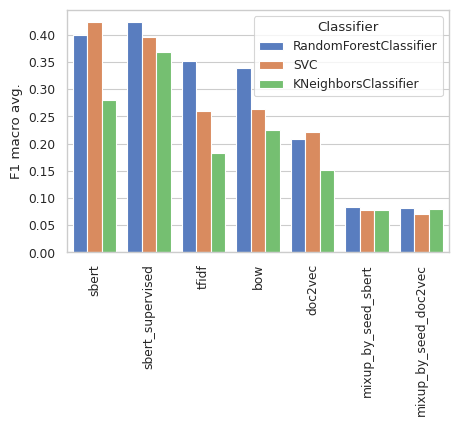

In [32]:
fig, axis = plt.subplots(1, 1, figsize=(12.5 * CM, 8 * CM))
sns.barplot(
    aggregated_scores,
    x="Embedding",
    y="F1 macro avg.",
    hue="Classifier",
    order=reversed(scores_sorted.index),
    ax=axis,
)
axis.set_xticks(
    axis.get_xticks(),
    labels=axis.get_xticklabels(),
    rotation=90,
)
axis.set_xlabel("")

In [33]:
fig.savefig(f"../paper/figs/cls_gs_{CONTEXT}_embed_comparison.png")

## Label prediction

In [34]:
best_cls_ana = ClassifierAnalysisResults.load(
    os.path.join(EXPERIMENT_ROOT, "best_classifier_analysis", f"{SBERT_NAME}.pkl")
)
lexical_cls_ana = ClassifierAnalysisResults.load(
    os.path.join(EXPERIMENT_ROOT, "best_classifier_analysis", "tfidf_all.pkl")
)

In [35]:
best_cls_ana.report

,ban,different meaning,formal sentence,future,generalization,minimal change,nonsense,nonstandard sentence,opposite meaning,paraphrase,past,possibility,simple sentence
precision,0.870830,0.191851,0.360824,0.826176,0.256216,0.204585,0.233674,0.420907,0.480985,0.178076,0.870613,0.849337,0.317488
recall,0.830546,0.548435,0.260990,0.729591,0.586559,0.098528,0.154797,0.211064,0.383874,0.090757,0.715656,0.833961,0.151143
f1-score,0.849593,0.283166,0.298217,0.773590,0.355242,0.131177,0.185033,0.277787,0.422371,0.118396,0.784332,0.839683,0.201583
support,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000


In [36]:
label_pred = pd.DataFrame(
    {
        "sbert": best_cls_ana.report.loc["f1-score"],
        "tfidf": lexical_cls_ana.report.loc["f1-score"],
    }
)

In [25]:
# We can sort by difference, but it looks worse. Further the difference is not
# directly presented, so it is wierd as well.
# label_pred["diff"] = label_pred["sbert"] - label_pred["tfidf"]
# label_pred.sort_values("diff", inplace=True, ascending=False)
label_pred

,sbert,tfidf
ban,0.676206,0.943087
different meaning,0.034060,0.069962
formal sentence,0.144661,0.193367
future,0.362498,0.488322
generalization,0.270369,0.232623
minimal change,0.097575,0.064457
nonsense,0.093175,0.097831
nonstandard sentence,0.232346,0.288070
opposite meaning,0.271531,0.197565
paraphrase,0.099563,0.076466


In [21]:
# label_pred.drop("diff", axis=1, inplace=True)

In [37]:
label_pred.sort_values("sbert", inplace=True, ascending=False)

In [38]:
label_pred = label_pred.stack().reset_index()
label_pred.columns = ["Transformation", "Embedding", "F1-score"]

Text(0.5, 0, '')

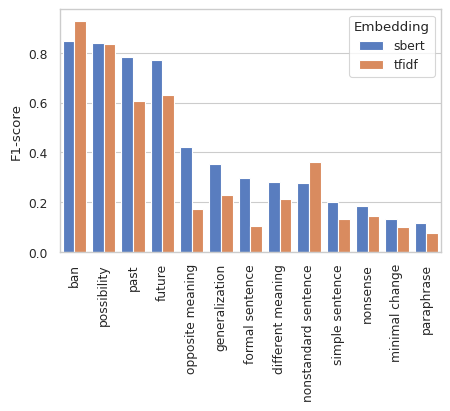

In [39]:
fig, axis = plt.subplots(1, 1, figsize=(12.5 * CM, 8 * CM))
sns.barplot(label_pred, x="Transformation", y="F1-score", hue="Embedding", ax=axis)
axis.set_xticks(
    axis.get_xticks(),
    labels=axis.get_xticklabels(),
    rotation=90,
)
axis.set_xlabel("")

In [40]:
fig.savefig(f"../paper/figs/cls_gs_{CONTEXT}_labels.png")

## Confusion matrix

In [41]:
def draw_conf_matrix_with_dists(
    conf_mat: pd.DataFrame, *, colormap: str, fig: plt.Figure
) -> plt.Figure:
    true_dist = conf_mat.sum(axis=1)
    pred_dist = conf_mat.sum(axis=0)

    conf_mat_norm = conf_mat.div(conf_mat.sum(axis=1), axis=0)
    conf_mat_norm *= 100

    grid = gridspec.GridSpec(
        2,
        2,
        figure=fig,
        width_ratios=[3.5, 1],
        height_ratios=[1, 3.5],
        hspace=0.05,
        wspace=0.05,
    )

    conf_mat_axis = fig.add_subplot(grid[1, 0])
    true_dist_axis = fig.add_subplot(grid[1, 1])
    pred_dist_axis = fig.add_subplot(grid[0, 0])

    sns.heatmap(
        conf_mat_norm,
        annot=True,
        ax=conf_mat_axis,
        fmt=".0f",
        cbar=False,
        cmap=colormap,
    )
    conf_mat_axis.set_ylabel("True")
    conf_mat_axis.set_xlabel("Predicted")

    def draw_dist(dist: pd.Series, axis: plt.Axes, *, vertical: bool = False) -> None:
        x = dist.index if not vertical else dist
        y = dist if not vertical else dist.index
        sns.barplot(x=x, y=y, ax=axis, color=mpl.colormaps[colormap](25))
        axis.set_frame_on(False)
        if not vertical:
            axis.set_xticklabels([])
        else:
            axis.set_yticklabels([])

    draw_dist(true_dist, true_dist_axis, vertical=True)
    draw_dist(pred_dist, pred_dist_axis, vertical=False)

    return fig

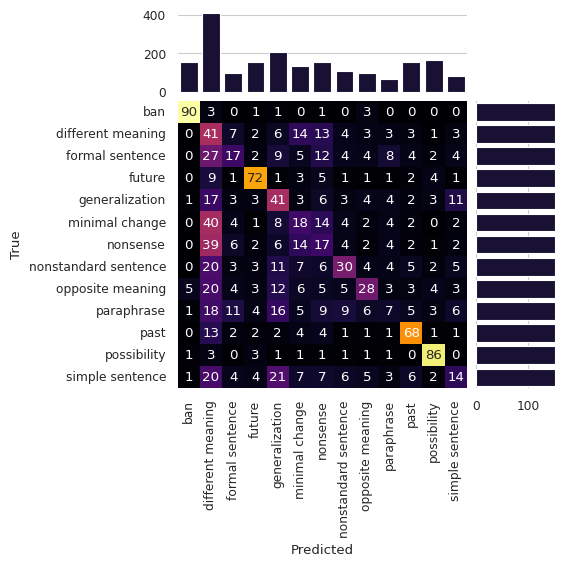

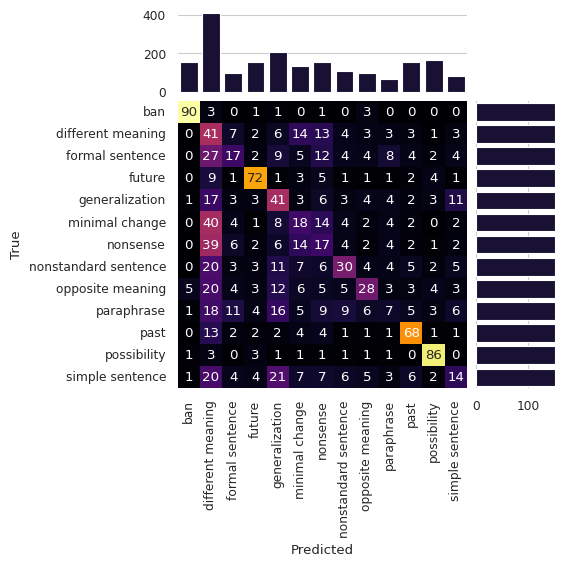

In [42]:
fig = plt.figure(figsize=(12.5 * CM, 12.5 * CM))
# conf_mat = best_cls_ana.confusion_matrix
conf_mat = reduce(
    lambda a, b: a.add(b),
    [
        ClassifierAnalysisResults.load(
            os.path.join(EXPERIMENT_ROOT, "best_classifier_analysis", path)
        ).confusion_matrix
        for path in [
            f"{SBERT_NAME}.pkl",
            "tfidf_all.pkl",
        ]
        + [f"{SBERT_NAME}_supervised_{i}.pkl" for i in range(SBERT_SUPERVISED_SPLITS)]
    ],
)
draw_conf_matrix_with_dists(
    conf_mat,
    colormap="inferno",
    fig=fig,
)

In [43]:
fig.savefig(f"../paper/figs/cls_gs_{CONTEXT}_conf_mat.png")

## SBERT's performance difference between no-context and diff context

In [26]:
def get_f1_diff(embed_name: str) -> pd.Series:
    no_context = ClassifierAnalysisResults.load(
        os.path.join(RESULTS_DIR, "no_context", "best_classifier_analysis", embed_name)
    )
    diff = ClassifierAnalysisResults.load(
        os.path.join(RESULTS_DIR, "diff", "best_classifier_analysis", embed_name)
    )

    perf_diff = pd.Series(
        diff.report.loc["f1-score"] - no_context.report.loc["f1-score"],
        name="F1-score percentage",
    )
    perf_diff /= diff.report.loc["f1-score"]
    perf_diff.sort_values(inplace=True, ascending=False)

    return perf_diff

In [35]:
perf_diff_sbert = get_f1_diff(f"{SBERT_NAME}.pkl")
tfidf_diff_sbert = get_f1_diff("tfidf_all.pkl")

perf_diff = pd.DataFrame({"sbert": perf_diff_sbert, "tfidf": tfidf_diff_sbert})
perf_diff = (
    perf_diff.sort_values(["sbert", "tfidf"], ascending=False).stack().reset_index()
)
perf_diff

,level_0,level_1,0
0,different meaning,sbert,0.879719
1,different meaning,tfidf,0.670712
2,past,sbert,0.619083
3,past,tfidf,0.308257
4,future,sbert,0.531407
5,future,tfidf,0.226198
6,formal sentence,sbert,0.514913
7,formal sentence,tfidf,-0.820162
8,nonsense,sbert,0.496442
9,nonsense,tfidf,0.321141


In [36]:
perf_diff.columns = ["Transformation", "Embedding", "F1 score percentage"]

Text(0.5, 0, '')

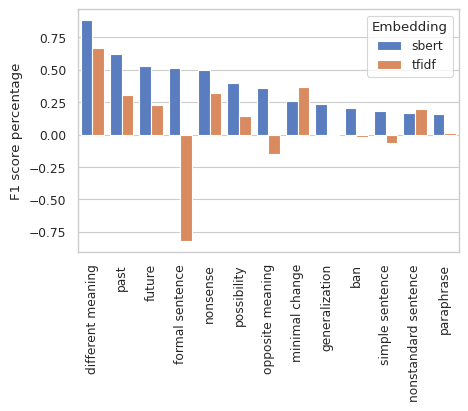

In [37]:
fig, axis = plt.subplots(1, 1, figsize=(12.5 * CM, 8 * CM))
sns.barplot(
    perf_diff, x="Transformation", y="F1 score percentage", hue="Embedding", ax=axis
)
axis.set_xticks(axis.get_xticks(), axis.get_xticklabels(), rotation=90)
axis.set_xlabel("")

In [38]:
fig.savefig("../paper/figs/cls_gs_labels_context_diff.png")

## Best params table

In [7]:
params.sort_index(inplace=True)
best_params = {"SVC": [], "RandomForestClassifier": [], "KNeighborsClassifier": []}


best_params

{'SVC': [], 'RandomForestClassifier': [], 'KNeighborsClassifier': []}

In [8]:
for context in ["diff", "no_context"]:
    params = pd.read_pickle(os.path.join(RESULTS_DIR, context, "params.pkl"))
    scores = pd.read_pickle(os.path.join(RESULTS_DIR, context, "scores.pkl"))

    params = process_params_or_scores(params)
    scores = process_params_or_scores(scores)

    for embed, clss_params in params.iterrows():
        best_cls = scores.loc[embed].idxmax()
        row = {"Embedding": embed, "Context": re.sub("_", "-", context)}
        row.update(params.loc[embed, best_cls])
        if best_cls == "RandomForestClassifier":
            row["max_depth"] = str(row["max_depth"])

        best_params[best_cls].append(row)

best_params

{'SVC': [{'Embedding': 'sbert',
   'Context': 'diff',
   'svc__gamma': 'auto',
   'svc__kernel': 'rbf'},
  {'Embedding': 'doc2vec',
   'Context': 'diff',
   'svc__gamma': 'auto',
   'svc__kernel': 'rbf'},
  {'Embedding': 'sbert_supervised_0',
   'Context': 'no-context',
   'svc__gamma': 'auto',
   'svc__kernel': 'rbf'},
  {'Embedding': 'sbert',
   'Context': 'no-context',
   'svc__gamma': 'auto',
   'svc__kernel': 'rbf'},
  {'Embedding': 'doc2vec',
   'Context': 'no-context',
   'svc__gamma': 'auto',
   'svc__kernel': 'rbf'},
  {'Embedding': 'sbert_supervised_2',
   'Context': 'no-context',
   'svc__gamma': 'auto',
   'svc__kernel': 'rbf'}],
 'RandomForestClassifier': [{'Embedding': 'sbert_supervised_4',
   'Context': 'diff',
   'max_depth': 'None',
   'min_samples_split': 10,
   'n_estimators': 100},
  {'Embedding': 'sbert_supervised_1',
   'Context': 'diff',
   'max_depth': 'None',
   'min_samples_split': 5,
   'n_estimators': 200},
  {'Embedding': 'sbert_supervised_3',
   'Context':

In [9]:
for key, rows in best_params.items():
    params_df = pd.DataFrame(rows)
    best_params[key] = params_df.dropna()

best_params

{'SVC':             Embedding     Context svc__gamma svc__kernel
 0               sbert        diff       auto         rbf
 1             doc2vec        diff       auto         rbf
 2  sbert_supervised_0  no-context       auto         rbf
 3               sbert  no-context       auto         rbf
 4             doc2vec  no-context       auto         rbf
 5  sbert_supervised_2  no-context       auto         rbf,
 'RandomForestClassifier':                 Embedding     Context max_depth  min_samples_split  \
 0      sbert_supervised_4        diff      None                 10   
 1      sbert_supervised_1        diff      None                  5   
 2      sbert_supervised_3        diff      None                  5   
 3      sbert_supervised_2        diff        25                 10   
 4                   tfidf        diff      None                 20   
 5      sbert_supervised_0        diff      None                  5   
 6   mixup_by_seed_doc2vec        diff      None               

In [10]:
def sanitize_underscores(string: str) -> str:
    string = re.sub("_", r"\_", string)
    return string


def format_classifier(cls_name: str) -> str:
    return rf"\Cls{{{cls_name}}}"


def format_embed_name(embed_name: str) -> str:
    return rf"\Embed{{{sanitize_underscores(embed_name)}}}"


def format_col(col_name: str) -> str:
    if col_name in ["Embedding", "Context"]:
        return col_name

    double_underscore_ind = col_name.find("__")
    if double_underscore_ind > -1:
        col_name = col_name[double_underscore_ind + 2 :]

    return rf"\texttt{{{sanitize_underscores(col_name)}}}"

In [13]:
def save_params_to_latex(params: pd.DataFrame, path: str) -> None:
    styler = (
        params.set_index(["Context", "Embedding"])
        .sort_index()
        .style.format_index(
            {
                "Embedding": format_embed_name,
            }
        )
        .format_index(format_col, axis=1)
    )

    tmp_path = f"{path}_tmp"
    styler.to_latex(
            tmp_path,
        hrules=True,
        column_format="l" + "c" * len(params.columns),
        clines="skip-last;data",
    )

    out_lines = []
    with open(tmp_path, mode='r') as in_table:
        for line in in_table:
            if line.startswith(r"\cline"):
                out_lines.append(r"\noalign{\smallskip}")
                out_lines.append(line.strip())
                out_lines.append(r"\noalign{\smallskip}")
            else:
                out_lines.append(line.strip())


    out_lines = out_lines[:-5] + out_lines[-2:]
    with open(path, mode='w') as out_table:
        for line in out_lines:
            print(line, file=out_table)

    os.remove(tmp_path)

In [14]:
for key, params_df in best_params.items():
    save_params_to_latex(params_df, f"../paper/cls_gs_best_params_{key}_tab.tex")